In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders
from sklearn.preprocessing import OrdinalEncoder
import missingno
from sklearn.metrics import mean_absolute_error

In [2]:
# Ruta del archivo
file_path_dataset = "C:/Users/Windows 10/Desktop/MASTER DATASCIENCE/TFM/df_central_2_1.csv"

# Leer el archivo CSV y establecer la tercera columna como índice
df_central = pd.read_csv(file_path_dataset, delimiter=',') 

df_central.tail(10)

,Unnamed: 0,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_PREV_LOW,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
25056,25056,2023-11-15,15,22.9,5.740,17.160,1,0,1,2,False,2023,11,15
25057,25057,2023-11-15,16,28.8,3.356,25.444,1,0,1,2,False,2023,11,15
25058,25058,2023-11-15,17,30.6,2.224,28.376,1,0,1,2,False,2023,11,15
25059,25059,2023-11-15,18,15.7,4.066,11.634,1,0,1,2,False,2023,11,15
25060,25060,2023-11-15,19,0.4,0.008,0.392,1,0,1,2,False,2023,11,15
25061,25061,2023-11-15,20,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25062,25062,2023-11-15,21,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25063,25063,2023-11-15,22,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25064,25064,2023-11-15,23,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25065,25065,2023-11-15,24,0.0,0.000,0.000,0,0,0,2,False,2023,11,15


In [3]:
df_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25066 entries, 0 to 25065
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25066 non-null  int64  
 1   Fecha          25066 non-null  object 
 2   Period         25066 non-null  int64  
 3   PREVISION      25066 non-null  float64
 4   E_SIMEL        25066 non-null  float64
 5   DESVIO         25066 non-null  float64
 6   f_PREV_HIGH    25066 non-null  int64  
 7   f_PREV_LOW     25066 non-null  int64  
 8   f_RUN          25066 non-null  int64  
 9   Dia_Semana     25066 non-null  int64  
 10  Es_fin_semana  25066 non-null  bool   
 11  Año            25066 non-null  int64  
 12  Mes            25066 non-null  int64  
 13  Día            25066 non-null  int64  
dtypes: bool(1), float64(3), int64(9), object(1)
memory usage: 2.5+ MB


In [4]:
# Realizando el mismo tratamiento de variables, pero manteniendo la columna 'E_SIMEL'
df_central.drop(['Unnamed: 0', 'f_PREV_HIGH', 'f_PREV_LOW', 'DESVIO'], axis=1, inplace=True)

# Convirtiendo la columna 'Fecha' a datetime
df_central['Fecha'] = pd.to_datetime(df_central['Fecha'])

# Convirtiendo la columna 'f_RUN' a booleano en df_central_e_simel
df_central['f_RUN'] = df_central['f_RUN'].astype(bool)

df_central.head()


,Fecha,Period,PREVISION,E_SIMEL,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,2021-01-01,1,0.0,0.0,False,4,False,2021,1,1
1,2021-01-01,2,0.0,0.0,False,4,False,2021,1,1
2,2021-01-01,3,0.0,0.0,False,4,False,2021,1,1
3,2021-01-01,4,0.0,0.0,False,4,False,2021,1,1
4,2021-01-01,5,0.0,0.0,False,4,False,2021,1,1


In [5]:
# Dividiendo el DataFrame en df_inicio y df_final con las mismas fechas que el archivo anterior
df_inicio = df_central[df_central['Fecha'] <= '2023-10-31']
df_final = df_central[df_central['Fecha'] >= '2023-11-05']

In [6]:
# Eliminar la columna 'Fecha'
df_inicio = df_inicio.drop('Fecha', axis=1)

In [7]:
# Eliminar la columna 'Fecha'
df_final = df_final.drop('Fecha', axis=1)

In [8]:
# df_inicio['Es_fin_semana'] = df_inicio['Es_fin_semana'].astype(int)


In [9]:
# df_final['Es_fin_semana'] = df_final['Es_fin_semana'].astype(int)

In [10]:
# Convirtiendo la columna 'f_RUN' a booleano en df_central_e_simel
# df_central_e_simel['f_RUN'] = df_central_e_simel['f_RUN'].astype(bool)

In [11]:
df_final.head(30)

,Period,PREVISION,E_SIMEL,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
24802,1,0.0,0.000,False,6,True,2023,11,5
24803,2,0.0,0.000,False,6,True,2023,11,5
24804,3,0.0,0.000,False,6,True,2023,11,5
24805,4,0.0,0.000,False,6,True,2023,11,5
24806,5,0.0,0.000,False,6,True,2023,11,5
24807,6,0.0,0.000,False,6,True,2023,11,5
24808,7,0.0,0.000,False,6,True,2023,11,5
24809,8,0.0,0.000,False,6,True,2023,11,5
24810,9,0.0,0.000,False,6,True,2023,11,5
24811,10,0.0,0.000,False,6,True,2023,11,5


In [12]:
df_inicio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24706 entries, 0 to 24705
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Period         24706 non-null  int64  
 1   PREVISION      24706 non-null  float64
 2   E_SIMEL        24706 non-null  float64
 3   f_RUN          24706 non-null  bool   
 4   Dia_Semana     24706 non-null  int64  
 5   Es_fin_semana  24706 non-null  bool   
 6   Año            24706 non-null  int64  
 7   Mes            24706 non-null  int64  
 8   Día            24706 non-null  int64  
dtypes: bool(2), float64(2), int64(5)
memory usage: 1.6 MB


In [13]:
X_inicio = df_inicio.drop('E_SIMEL', axis=1)  # Excluyendo la variable objetivo
y_inicio = df_inicio['E_SIMEL']  # Variable objetivo

# Dividiendo los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train_inicio, X_test_inicio, y_train_inicio, y_test_inicio = train_test_split(X_inicio, y_inicio, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo
rf = RandomForestRegressor(random_state=42)

# Definir la grilla de parámetros para probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    # Puedes añadir más parámetros aquí
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train_inicio, y_train_inicio)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejores parámetros: {'max_depth': 30, 'n_estimators': 100}
Mejor puntuación: -29.101777899717888


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo con los mejores hiperparámetros
rf_optimizado = RandomForestRegressor(n_estimators=100, max_depth=30, random_state=42)

# Entrenar el modelo
rf_optimizado.fit(X_train_inicio, y_train_inicio)


RandomForestRegressor(max_depth=30, random_state=42)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones en el conjunto de prueba
y_pred_test = rf_optimizado.predict(X_test_inicio)

# Calcular MSE y R²
mse_test = mean_squared_error(y_test_inicio, y_pred_test)
r2_test = r2_score(y_test_inicio, y_pred_test)

print("MSE en el conjunto de prueba:", mse_test)
print("R² en el conjunto de prueba:", r2_test)


MSE en el conjunto de prueba: 26.537271938045265
R² en el conjunto de prueba: 0.9069882520718467


In [17]:
from fancyimpute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


# Configurar el RandomForestRegressor con hiperparámetros específicos
estimador_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Crear el imputador MICE
mice_imputer = IterativeImputer(estimator=estimador_rf, random_state=42)

# Entrenar el imputador con df_inicio (usando solo las columnas 'f_RUN')
mice_imputer.fit(df_inicio[['Period', 'PREVISION','f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])



IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [18]:
# Seleccionar las filas de df_final para el 05-11-2023
df_final_05_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]

df_final_05_11_para_imputar = df_final_05_11.drop(['E_SIMEL'], axis=1)

df_final_05_11_para_imputar[['f_RUN']] = np.nan  # Convertir todos los valores de 'f_RUN' a NaN

# Imputar los valores en estas filas para 'f_RUN'
valores_imputados = mice_imputer.transform(df_final_05_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

# Seleccionar solo la primera columna del array 'valores_imputados', que corresponde a 'f_RUN'

valores_imputados_f_RUN = valores_imputados[:, 2]  # Cuarta columna para 'f_RUN'
# Convertir a booleano según el umbral
valores_imputados_f_RUN_boolean = np.where(valores_imputados_f_RUN > 0.2, True, False)

# Actualizar solo la columna 'f_RUN' en df_final con los valores imputados convertidos a booleanos
df_final_05_11.loc[df_final_05_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean


# Asegurarse de que las características coincidan con las utilizadas durante el entrenamiento
caracteristicas_para_prediccion = df_final_05_11.drop('E_SIMEL', axis=1)  # Excluyendo 'E_SIMEL'

# Realizar la predicción con el modelo entrenado
predicted_e_simel_05_11 = rf_optimizado.predict(caracteristicas_para_prediccion)

# Crear un DataFrame para visualizar las predicciones junto con las fechas y otros detalles relevantes
df_predicciones_05_11 = df_final_05_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_05_11['predicted_E_SIMEL'] = predicted_e_simel_05_11

# Mostrar el DataFrame resultante
df_predicciones_05_11.head(30)


,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24802,2023,11,5,0.0,0.000,0.00000
24803,2023,11,5,0.0,0.000,0.00000
24804,2023,11,5,0.0,0.000,0.00000
24805,2023,11,5,0.0,0.000,0.00000
24806,2023,11,5,0.0,0.000,0.00000
24807,2023,11,5,0.0,0.000,0.00000
24808,2023,11,5,0.0,0.000,0.00000
24809,2023,11,5,0.0,0.000,0.00000
24810,2023,11,5,0.0,0.000,0.00000
24811,2023,11,5,0.0,0.000,0.00000


In [19]:
# Calcular la suma total de los valores reales y los predichos
suma_real = df_predicciones_05_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_05_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_05_11['PREVISION'].sum()
# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual = 100 * abs(suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  # O algún otro valor para indicar que no se puede calcular


# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual_prevision = 100 * abs(suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  # O algún otro valor para indicar que no se puede calcular

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  15.937000000000001
Suma predicha:  46.54531999999997
Desviación porcentual:  192.05822927778104 %
Suma previsión:  0.0
Desviación porcentual:  100.0 %


In [ ]:
# NOS ENCONTRAMOS QUE PARA LOS DÍAS 11 Y 12 DE NOVIEMBRE NO HAY DATOS Y APROVECHAMOS PARA CREAR UNA FUNCION PARA AGILIZAR
# EL PROCESO DE ACTUALIZACION, REENTRENO DE LOS MODELO, PREDICCION Y CÁLCULO METRICAS

def predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, mes, ano, df_inicio_actualizado, df_final, modelo_gb, imputador):
    """
    Args:
    dia_actual (int): Día actual para el que se actualizarán los datos.
    mes (int): Mes del día actual.
    ano (int): Año del día actual.
    df_inicio_actualizado (DataFrame): DataFrame actualizado con los datos hasta el día anterior.
    df_final (DataFrame): DataFrame con los datos a predecir.
    modelo_gb (GradientBoostingRegressor): Modelo Gradient Boosting entrenado.
    imputador (IterativeImputer): Imputador MICE entrenado.

    Returns:
    DataFrame: DataFrame con las predicciones para el día siguiente.
    DataFrame: DataFrame actualizado con los datos reales del día actual.
    """
    # ACTUALIZAR df_actualizado CON LOS DATOS DEL dia_actual
    datos_dia_actual = df_final[(df_final['Año'] == ano) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_actual)]
    df_inicio_actualizado = pd.concat([df_inicio_actualizado, datos_dia_actual])

    # REENTRENAMOS LOS MODELOS
    X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
    y_train_actualizado = df_inicio_actualizado['E_SIMEL']
    modelo_gb.fit(X_train_actualizado, y_train_actualizado)
    mice_imputer.fit(df_inicio_actualizado[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

    # IMPUTACION
    df_dia_siguiente = df_final[(df_final['Año'] == ano) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_siguiente)]
    df_dia_siguiente_para_imputar = df_dia_siguiente.drop(['E_SIMEL'], axis=1)
    df_dia_siguiente_para_imputar[['f_RUN']] = np.nan  
    
    valores_imputados = mice_imputer.transform(df_dia_siguiente_para_imputar)
    
    df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)  

    # PREPARAR PARA LA PREDICCION Y REALIZARLA
    X_prediccion = df_dia_siguiente.drop('E_SIMEL', axis=1)

    predicted_e_simel = gb_reg_optimizado.predict(X_prediccion)

    predicted_e_simel = np.maximum(predicted_e_simel, 0)

    # DATAFRAME CON LOS RESULTADOS
    df_predicciones = df_dia_siguiente[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
    df_predicciones['predicted_E_SIMEL'] = predicted_e_simel

    # CALCULO DE LAS METRICAS
    mse = mean_squared_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    r2 = r2_score(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    mae = mean_absolute_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])


    return df_predicciones, df_inicio_actualizado, mse, r2, mae

In [20]:
# Paso 1: Actualizar df_inicio con los datos del día 5
datos_dia_5 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]
df_inicio_actualizado = pd.concat([df_inicio, datos_dia_5])

# Paso 2: Reentrenar el modelo con df_inicio actualizado
# Asegúrate de utilizar las mismas características y preparación de datos que antes
X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado['E_SIMEL']
rf_optimizado.fit(X_train_actualizado, y_train_actualizado)

# Pasos 3 y 4: Procede con la imputación y predicción para el día 6 como has hecho para el día 5


RandomForestRegressor(max_depth=30, random_state=42)

In [21]:
# Configurar el RandomForestRegressor con hiperparámetros específicos
estimador_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Crear el imputador MICE
mice_imputer = IterativeImputer(estimator=estimador_rf, random_state=42)

# Entrenar el imputador con df_inicio (usando solo las columnas 'f_RUN')
mice_imputer.fit(df_inicio_actualizado[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [22]:
# Seleccionar las filas de df_final para el 06-11-2023
df_final_06_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 6)]

df_final_06_11_para_imputar = df_final_06_11.drop(['E_SIMEL'], axis=1)

df_final_06_11_para_imputar[['f_RUN']] = np.nan  # Convertir todos los valores de 'f_RUN' a NaN

# Imputar los valores en estas filas para 'f_RUN'
valores_imputados_06 = mice_imputer.transform(df_final_06_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

# Seleccionar solo la primera columna del array 'valores_imputados', que corresponde a 'f_RUN'

valores_imputados_f_RUN_06 = valores_imputados[:, 2]  # Cuarta columna para 'f_RUN'

# Convertir a booleano según el umbral
valores_imputados_f_RUN_boolean_06 = np.where(valores_imputados_f_RUN_06 > 0.2, True, False)

# Actualizar solo la columna 'f_RUN' en df_final con los valores imputados convertidos a booleanos
df_final_06_11.loc[df_final_06_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean_06


# Asegurarse de que las características coincidan con las utilizadas durante el entrenamiento
caracteristicas_para_prediccion = df_final_06_11.drop('E_SIMEL', axis=1)  # Excluyendo 'E_SIMEL'

# Realizar la predicción con el modelo entrenado
predicted_e_simel_06_11 = rf_optimizado.predict(caracteristicas_para_prediccion)

# Crear un DataFrame para visualizar las predicciones junto con las fechas y otros detalles relevantes
df_predicciones_06_11 = df_final_06_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_06_11['predicted_E_SIMEL'] = predicted_e_simel_06_11

# Mostrar el DataFrame resultante
df_predicciones_06_11.head(30)

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24826,2023,11,6,0.0,0.000,0.00000
24827,2023,11,6,0.0,0.000,0.00000
24828,2023,11,6,0.0,0.000,0.00000
24829,2023,11,6,0.0,0.000,0.00000
24830,2023,11,6,0.0,0.000,0.00000
24831,2023,11,6,0.0,0.000,0.00000
24832,2023,11,6,0.0,0.000,0.00000
24833,2023,11,6,0.0,0.000,0.00000
24834,2023,11,6,0.0,0.000,0.00000
24835,2023,11,6,0.0,0.000,0.00000


In [23]:
# Calcular la suma total de los valores reales y los predichos
suma_real = df_predicciones_06_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_06_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_06_11['PREVISION'].sum()
# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual = 100 * abs(suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  # O algún otro valor para indicar que no se puede calcular


# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual_prevision = 100 * abs(suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  # O algún otro valor para indicar que no se puede calcular

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.542
Suma predicha:  95.50424999999998
Desviación porcentual:  63.13800348467764 %
Suma previsión:  159.4
Desviación porcentual:  172.2831471422227 %


In [24]:
# Paso 1: Actualizar df_inicio con los datos del día 5
datos_dia_6 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 6)]
df_inicio_actualizado_06 = pd.concat([df_inicio_actualizado, datos_dia_6])

# Paso 2: Reentrenar el modelo con df_inicio actualizado
# Asegúrate de utilizar las mismas características y preparación de datos que antes
X_train_actualizado = df_inicio_actualizado_06.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado_06['E_SIMEL']
rf_optimizado.fit(X_train_actualizado, y_train_actualizado)

# Pasos 3 y 4: Procede con la imputación y predicción para el día 6 como has hecho para el día 5

RandomForestRegressor(max_depth=30, random_state=42)

In [25]:
# Seleccionar las filas de df_final para el 06-11-2023
df_final_07_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 7)]

df_final_07_11_para_imputar = df_final_07_11.drop(['E_SIMEL'], axis=1)

df_final_07_11_para_imputar[['f_RUN']] = np.nan  # Convertir todos los valores de 'f_RUN' a NaN

# Imputar los valores en estas filas para 'f_RUN'
valores_imputados_07 = mice_imputer.transform(df_final_07_11_para_imputar[['Period', 'PREVISION','f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

# Seleccionar solo la primera columna del array 'valores_imputados', que corresponde a 'f_RUN'

valores_imputados_f_RUN_07 = valores_imputados_07[:, 2]

# Convertir a booleano según el umbral
valores_imputados_f_RUN_boolean_07 = np.where(valores_imputados_f_RUN_07 > 0.2, True, False)

# Actualizar solo la columna 'f_RUN' en df_final con los valores imputados convertidos a booleanos
df_final_07_11.loc[df_final_07_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean_07


# Asegurarse de que las características coincidan con las utilizadas durante el entrenamiento
caracteristicas_para_prediccion = df_final_07_11.drop('E_SIMEL', axis=1)  # Excluyendo 'E_SIMEL'

# Realizar la predicción con el modelo entrenado
predicted_e_simel_07_11 = rf_optimizado.predict(caracteristicas_para_prediccion)

# Crear un DataFrame para visualizar las predicciones junto con las fechas y otros detalles relevantes
df_predicciones_07_11 = df_final_07_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL',]].copy()
df_predicciones_07_11['predicted_E_SIMEL'] = predicted_e_simel_07_11

# Mostrar el DataFrame resultante
df_predicciones_07_11.head(30)

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24850,2023,11,7,0.0,0.000,0.00000
24851,2023,11,7,0.0,0.000,0.00000
24852,2023,11,7,0.0,0.000,0.00000
24853,2023,11,7,0.0,0.000,0.00000
24854,2023,11,7,0.0,0.000,0.00000
24855,2023,11,7,0.0,0.000,0.00000
24856,2023,11,7,0.0,0.000,0.00000
24857,2023,11,7,0.0,0.000,0.00000
24858,2023,11,7,0.0,0.000,0.00000
24859,2023,11,7,0.0,0.000,0.00000


In [26]:
# Calcular la suma total de los valores reales y los predichos
suma_real = df_predicciones_07_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_07_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_07_11['PREVISION'].sum()
# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual = 100 * abs(suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  # O algún otro valor para indicar que no se puede calcular


# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual_prevision = 100 * abs(suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  # O algún otro valor para indicar que no se puede calcular

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  67.97999999999999
Suma predicha:  60.89539
Desviación porcentual:  10.421609296852004 %
Suma previsión:  24.0
Desviación porcentual:  64.6954986760812 %


In [27]:
# Paso 1: Actualizar df_inicio con los datos del día 5
datos_dia_7 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 7)]
df_inicio_actualizado_07 = pd.concat([df_inicio_actualizado_06, datos_dia_7])

# Paso 2: Reentrenar el modelo con df_inicio actualizado
# Asegúrate de utilizar las mismas características y preparación de datos que antes
X_train_actualizado = df_inicio_actualizado_07.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado_07['E_SIMEL']
rf_optimizado.fit(X_train_actualizado, y_train_actualizado)

# Pasos 3 y 4: Procede con la imputación y predicción para el día 6 como has hecho para el día 5

RandomForestRegressor(max_depth=30, random_state=42)

In [28]:
# Configurar el RandomForestRegressor con hiperparámetros específicos
estimador_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Crear el imputador MICE
mice_imputer = IterativeImputer(estimator=estimador_rf, random_state=42)

# Entrenar el imputador con df_inicio (usando solo las columnas 'f_RUN')
mice_imputer.fit(df_inicio_actualizado_07[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [29]:
# Seleccionar las filas de df_final para el 06-11-2023
df_final_08_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 8)]

df_final_08_11_para_imputar = df_final_08_11.drop(['E_SIMEL'], axis=1)

df_final_08_11_para_imputar['f_RUN'] = np.nan  # Convertir todos los valores de 'f_RUN' a NaN

# Imputar los valores en estas filas para 'f_RUN'
valores_imputados_08 = mice_imputer.transform(df_final_08_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

# Seleccionar solo la primera columna del array 'valores_imputados', que corresponde a 'f_RUN'
valores_imputados_f_RUN_08 = valores_imputados_08[:, 2]

# Convertir a booleano según el umbral
valores_imputados_f_RUN_boolean_08 = np.where(valores_imputados_f_RUN_08 > 0.2, True, False)

# Actualizar solo la columna 'f_RUN' en df_final con los valores imputados convertidos a booleanos
df_final_08_11.loc[df_final_08_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean_08

# Asegurarse de que las características coincidan con las utilizadas durante el entrenamiento
caracteristicas_para_prediccion = df_final_08_11.drop('E_SIMEL', axis=1)  # Excluyendo 'E_SIMEL'

# Realizar la predicción con el modelo entrenado
predicted_e_simel_08_11 = rf_optimizado.predict(caracteristicas_para_prediccion)

# Crear un DataFrame para visualizar las predicciones junto con las fechas y otros detalles relevantes
df_predicciones_08_11 = df_final_08_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_08_11['predicted_E_SIMEL'] = predicted_e_simel_08_11

# Mostrar el DataFrame resultante
df_predicciones_08_11.head(30)

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24874,2023,11,8,0.0,0.000,0.0
24875,2023,11,8,0.0,0.000,0.0
24876,2023,11,8,0.0,0.000,0.0
24877,2023,11,8,0.0,0.000,0.0
24878,2023,11,8,0.0,0.000,0.0
24879,2023,11,8,0.0,0.000,0.0
24880,2023,11,8,0.0,0.000,0.0
24881,2023,11,8,0.0,0.000,0.0
24882,2023,11,8,0.0,0.000,0.0
24883,2023,11,8,0.0,0.000,0.0


In [30]:
# Calcular la suma total de los valores reales y los predichos
suma_real = df_predicciones_08_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_08_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_08_11['PREVISION'].sum()
# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual = 100 * abs(suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  # O algún otro valor para indicar que no se puede calcular


# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual_prevision = 100 * abs(suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  # O algún otro valor para indicar que no se puede calcular

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  11.296999999999999
Suma predicha:  0.0
Desviación porcentual:  100.0 %
Suma previsión:  0.0
Desviación porcentual:  100.0 %


In [31]:
# Paso 1: Actualizar df_inicio con los datos del día 5
datos_dia_8 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 8)]
df_inicio_actualizado_08 = pd.concat([df_inicio_actualizado_07, datos_dia_8])

# Paso 2: Reentrenar el modelo con df_inicio actualizado
# Asegúrate de utilizar las mismas características y preparación de datos que antes
X_train_actualizado = df_inicio_actualizado_08.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado_08['E_SIMEL']
rf_optimizado.fit(X_train_actualizado, y_train_actualizado)

RandomForestRegressor(max_depth=30, random_state=42)

In [32]:
# Configurar el RandomForestRegressor con hiperparámetros específicos
estimador_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Crear el imputador MICE
mice_imputer = IterativeImputer(estimator=estimador_rf, random_state=42)

# Entrenar el imputador con df_inicio (usando solo las columnas 'f_RUN')
mice_imputer.fit(df_inicio_actualizado_08[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [33]:
# Seleccionar las filas de df_final para el 06-11-2023
df_final_09_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 9)]

df_final_09_11_para_imputar = df_final_09_11.drop(['E_SIMEL'], axis=1)

df_final_09_11_para_imputar['f_RUN'] = np.nan  # Convertir todos los valores de 'f_RUN' a NaN

# Imputar los valores en estas filas para 'f_RUN'
valores_imputados_09 = mice_imputer.transform(df_final_09_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

# Seleccionar solo la primera columna del array 'valores_imputados', que corresponde a 'f_RUN'
valores_imputados_f_RUN_09 = valores_imputados_09[:, 2]

# Convertir a booleano según el umbral
valores_imputados_f_RUN_boolean_09 = np.where(valores_imputados_f_RUN_09 > 0.2, True, False)

# Actualizar solo la columna 'f_RUN' en df_final con los valores imputados convertidos a booleanos
df_final_09_11.loc[df_final_09_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean_09

# Asegurarse de que las características coincidan con las utilizadas durante el entrenamiento
caracteristicas_para_prediccion = df_final_09_11.drop('E_SIMEL', axis=1)  # Excluyendo 'E_SIMEL'

# Realizar la predicción con el modelo entrenado
predicted_e_simel_09_11 = rf_optimizado.predict(caracteristicas_para_prediccion)

# Crear un DataFrame para visualizar las predicciones junto con las fechas y otros detalles relevantes
df_predicciones_09_11 = df_final_09_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_09_11['predicted_E_SIMEL'] = predicted_e_simel_09_11

# Mostrar el DataFrame resultante
df_predicciones_09_11.head(30)

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24898,2023,11,9,0.0,0.000,0.00000
24899,2023,11,9,0.0,0.000,0.00000
24900,2023,11,9,0.0,0.000,0.00000
24901,2023,11,9,0.0,0.000,0.00000
24902,2023,11,9,0.0,0.000,0.00000
24903,2023,11,9,0.0,0.000,0.00000
24904,2023,11,9,0.0,0.000,0.00000
24905,2023,11,9,0.0,0.000,0.00000
24906,2023,11,9,0.0,0.000,0.00000
24907,2023,11,9,0.0,0.000,0.00000


In [34]:
# Calcular la suma total de los valores reales y los predichos
suma_real = df_predicciones_09_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_09_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_09_11['PREVISION'].sum()
# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual = 100 * abs(suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  # O algún otro valor para indicar que no se puede calcular


# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual_prevision = 100 * abs(suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  # O algún otro valor para indicar que no se puede calcular

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  102.43700000000001
Suma predicha:  108.60970999999998
Desviación porcentual:  6.025859796753093 %
Suma previsión:  127.30000000000001
Desviación porcentual:  24.271503460663627 %


In [35]:
# Paso 1: Actualizar df_inicio con los datos del día 5
datos_dia_9 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 9)]
df_inicio_actualizado_09 = pd.concat([df_inicio_actualizado_07, datos_dia_9])

# Paso 2: Reentrenar el modelo con df_inicio actualizado
# Asegúrate de utilizar las mismas características y preparación de datos que antes
X_train_actualizado = df_inicio_actualizado_09.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado_09['E_SIMEL']
rf_optimizado.fit(X_train_actualizado, y_train_actualizado)

# Pasos 3 y 4: Procede con la imputación y predicción para el día 6 como has hecho para el día 5

RandomForestRegressor(max_depth=30, random_state=42)

In [36]:
# Seleccionar las filas de df_final para el 06-11-2023
df_final_10_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 10)]

df_final_10_11_para_imputar = df_final_10_11.drop(['E_SIMEL'], axis=1)

df_final_10_11_para_imputar['f_RUN'] = np.nan  # Convertir todos los valores de 'f_RUN' a NaN

# Imputar los valores en estas filas para 'f_RUN'
valores_imputados_10 = mice_imputer.transform(df_final_10_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

# Seleccionar solo la primera columna del array 'valores_imputados', que corresponde a 'f_RUN'
valores_imputados_f_RUN_10 = valores_imputados_10[:, 2]

# Convertir a booleano según el umbral
valores_imputados_f_RUN_boolean_10 = np.where(valores_imputados_f_RUN_10 > 0.2, True, False)

# Actualizar solo la columna 'f_RUN' en df_final con los valores imputados convertidos a booleanos
df_final_10_11.loc[df_final_10_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean_10

# Asegurarse de que las características coincidan con las utilizadas durante el entrenamiento
caracteristicas_para_prediccion = df_final_10_11.drop('E_SIMEL', axis=1)  # Excluyendo 'E_SIMEL'

# Realizar la predicción con el modelo entrenado
predicted_e_simel_10_11 = rf_optimizado.predict(caracteristicas_para_prediccion)

# Crear un DataFrame para visualizar las predicciones junto con las fechas y otros detalles relevantes
df_predicciones_10_11 = df_final_10_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_10_11['predicted_E_SIMEL'] = predicted_e_simel_10_11

# Mostrar el DataFrame resultante
df_predicciones_10_11.head(30)

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24922,2023,11,10,0.0,0.000,0.00000
24923,2023,11,10,0.0,0.000,0.00000
24924,2023,11,10,0.0,0.000,0.00000
24925,2023,11,10,0.0,0.000,0.00000
24926,2023,11,10,0.0,0.000,0.00000
24927,2023,11,10,0.0,0.000,0.00000
24928,2023,11,10,0.0,0.000,0.00000
24929,2023,11,10,0.0,0.000,0.00000
24930,2023,11,10,0.0,0.000,0.00000
24931,2023,11,10,0.0,0.000,0.00000


In [37]:
# Calcular la suma total de los valores reales y los predichos
suma_real = df_predicciones_10_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_10_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_10_11['PREVISION'].sum()
# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual = 100 * abs(suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  # O algún otro valor para indicar que no se puede calcular


# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual_prevision = 100 * abs(suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  # O algún otro valor para indicar que no se puede calcular

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.955
Suma predicha:  112.72325000000001
Desviación porcentual:  91.20218810957512 %
Suma previsión:  112.6
Desviación porcentual:  90.99313035365958 %


In [38]:
def predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, mes, ano, df_inicio_actualizado, df_final, modelo_rf, imputador):
    """
    Función para actualizar el conjunto de entrenamiento con los datos reales de un día específico,
    realizar la imputación para el día siguiente y predecir los valores de E_SIMEL para ese día.

    Args:
    dia_actual (int): Día actual para el que se actualizarán los datos.
    mes (int): Mes del día actual.
    ano (int): Año del día actual.
    df_inicio_actualizado (DataFrame): DataFrame actualizado con los datos hasta el día anterior.
    df_final (DataFrame): DataFrame con los datos a predecir.
    modelo_rf (RandomForestRegressor): Modelo de Random Forest entrenado.
    imputador (IterativeImputer): Imputador MICE entrenado.

    Returns:
    DataFrame: DataFrame con las predicciones para el día siguiente.
    DataFrame: DataFrame actualizado con los datos reales del día actual.
    """
    # Añadir datos reales del día actual a df_inicio_actualizado
    datos_dia_actual = df_final[(df_final['Año'] == ano) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_actual)]
    df_inicio_actualizado = pd.concat([df_inicio_actualizado, datos_dia_actual])

    # Reentrenar el modelo con df_inicio actualizado
    X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
    y_train_actualizado = df_inicio_actualizado['E_SIMEL']
    modelo_rf.fit(X_train_actualizado, y_train_actualizado)

    # Imputación para el día siguiente
    df_dia_siguiente = df_final[(df_final['Año'] == ano) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_siguiente)]
    df_dia_siguiente_para_imputar = df_dia_siguiente.drop(['E_SIMEL'], axis=1)
    df_dia_siguiente_para_imputar[['f_RUN']] = np.nan  # Convertir todos los valores de 'f_RUN' y 'DESVIO' a NaN

    # Imputar los valores en estas filas
    valores_imputados = mice_imputer.transform(df_dia_siguiente_para_imputar)
    
    df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)  # Cuarta columna para 'f_RUN'

    # Preparar los datos para la predicción de E_SIMEL
    X_prediccion = df_dia_siguiente.drop('E_SIMEL', axis=1)

    # Realizar la predicción
    predicted_e_simel = rf_optimizado.predict(X_prediccion)

    # Crear un DataFrame con los resultados
    df_predicciones = df_dia_siguiente[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
    df_predicciones['predicted_E_SIMEL'] = predicted_e_simel

    # Calcular métricas
    mse = mean_squared_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    r2 = r2_score(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    mae = mean_absolute_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])


    return df_predicciones, df_inicio_actualizado, mse, r2, mae

In [39]:
# Uso de la función para un día específico
dia_actual = 10  # El último día con datos disponibles
dia_siguiente = 13  # El día para el que se quiere hacer la predicción
df_predicciones_13_11, df_inicio_actualizado, mse_13_11, r2_13_11, mae_13_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, rf_optimizado, mice_imputer)
print("MSE:", mse_13_11, "R²:", r2_13_11, "MAE:", mae_13_11)

MSE: 40.59892224804584 R²: 0.5346628100553519 MAE: 2.6123662500000004


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8888\952790225.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)  # Cuarta columna para 'f_RUN'


In [40]:
# Calcular la suma total de los valores reales y los predichos
suma_real = df_predicciones_13_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_13_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_13_11['PREVISION'].sum()
# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual = 100 * abs(suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  # O algún otro valor para indicar que no se puede calcular


# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual_prevision = 100 * abs(suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  # O algún otro valor para indicar que no se puede calcular

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  107.141
Suma predicha:  44.44421
Desviación porcentual:  58.51801831231742 %
Suma previsión:  20.900000000000002
Desviación porcentual:  80.492995211917 %


In [41]:
df_predicciones_13_11

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24994,2023,11,13,0.0,0.000,0.00000
24995,2023,11,13,0.0,0.000,0.00000
24996,2023,11,13,0.0,0.000,0.00000
24997,2023,11,13,0.0,0.000,0.00000
24998,2023,11,13,0.0,0.000,0.00000
24999,2023,11,13,0.0,0.000,0.00000
25000,2023,11,13,0.0,0.000,0.00000
25001,2023,11,13,0.0,0.000,0.00000
25002,2023,11,13,0.0,0.000,0.00000
25003,2023,11,13,0.0,0.000,0.00000


In [42]:
# Uso de la función para un día específico
dia_actual = 13  # El último día con datos disponibles
dia_siguiente = 14  # El día para el que se quiere hacer la predicción
df_predicciones_14_11, df_inicio_actualizado, mse_14_11, r2_14_11, mae_14_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, rf_optimizado, mice_imputer)
print("MSE:", mse_14_11, "R²:", r2_14_11, "MAE:", mae_14_11)

MSE: 19.760386942295856 R²: 0.7901128891710443 MAE: 1.9161112500000013


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8888\952790225.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)  # Cuarta columna para 'f_RUN'


In [43]:
df_predicciones_14_11

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
25018,2023,11,14,0.0,0.000,0.00000
25019,2023,11,14,0.0,0.000,0.00000
25020,2023,11,14,0.0,0.000,0.00000
25021,2023,11,14,0.0,0.000,0.00000
25022,2023,11,14,0.0,0.000,0.00000
25023,2023,11,14,0.0,0.000,0.00000
25024,2023,11,14,0.0,0.000,0.00000
25025,2023,11,14,0.0,0.000,0.00000
25026,2023,11,14,0.0,0.000,0.00000
25027,2023,11,14,0.0,0.000,0.00000


In [44]:
# Calcular la suma total de los valores reales y los predichos
suma_real = df_predicciones_14_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_14_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_14_11['PREVISION'].sum()
# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual = 100 * abs(suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  # O algún otro valor para indicar que no se puede calcular


# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual_prevision = 100 * abs(suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  # O algún otro valor para indicar que no se puede calcular

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  112.33099999999999
Suma predicha:  109.28987000000001
Desviación porcentual:  2.7072936233096665 %
Suma previsión:  120.5
Desviación porcentual:  7.272257880727503 %


In [45]:
# Uso de la función para un día específico
dia_actual = 14  # El último día con datos disponibles
dia_siguiente = 15  # El día para el que se quiere hacer la predicción
df_predicciones_15_11, df_inicio_actualizado, mse_15_11, r2_15_11, mae_15_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, rf_optimizado, mice_imputer)
print("MSE:", mse_15_11, "R²:", r2_15_11, "MAE:", mae_15_11)

MSE: 70.84189673981247 R²: -0.3849600666228681 MAE: 4.563885416666666


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_8888\952790225.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)  # Cuarta columna para 'f_RUN'


In [46]:
# Calcular la suma total de los valores reales y los predichos
suma_real = df_predicciones_15_11['E_SIMEL'].sum()
suma_predicha = df_predicciones_15_11['predicted_E_SIMEL'].sum()
suma_prevision = df_predicciones_15_11['PREVISION'].sum()
# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual = 100 * abs(suma_predicha - suma_real) / suma_real
else:
    desviacion_porcentual = float('inf')  # O algún otro valor para indicar que no se puede calcular


# Calcular la desviación porcentual
if suma_real != 0:
    desviacion_porcentual_prevision = 100 * abs(suma_prevision - suma_real) / suma_real
else:
    desviacion_porcentual_prevision = float('inf')  # O algún otro valor para indicar que no se puede calcular

print("Suma real: ", suma_real)
print("Suma predicha: ", suma_predicha)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  88.333
Suma predicha:  120.31362999999999
Desviación porcentual:  36.204623413673254 %
Suma previsión:  131.89999999999998
Desviación porcentual:  49.32131819365354 %


In [47]:
df_predicciones_15_11

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
25042,2023,11,15,0.0,0.000,0.00000
25043,2023,11,15,0.0,0.000,0.00000
25044,2023,11,15,0.0,0.000,0.00000
25045,2023,11,15,0.0,0.000,0.00000
25046,2023,11,15,0.0,0.000,0.00000
25047,2023,11,15,0.0,0.000,0.00000
25048,2023,11,15,0.0,0.000,0.00000
25049,2023,11,15,0.0,0.000,0.00000
25050,2023,11,15,0.0,0.000,0.00000
25051,2023,11,15,0.0,0.000,0.00000


In [48]:
df_predicciones_totales = pd.concat([df_predicciones_05_11, df_predicciones_06_11, df_predicciones_07_11, df_predicciones_08_11, df_predicciones_09_11,df_predicciones_10_11, df_predicciones_13_11, df_predicciones_14_11, df_predicciones_15_11])
print(df_predicciones_totales.columns)  # Verificar si 'predicted_E_SIMEL' está presente


Index(['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL', 'predicted_E_SIMEL'], dtype='object')


In [49]:
mae = mean_absolute_error(df_predicciones_totales['E_SIMEL'], df_predicciones_totales['predicted_E_SIMEL'])
mse = mean_squared_error(df_predicciones_totales['E_SIMEL'], df_predicciones_totales['predicted_E_SIMEL'])
r2 = r2_score(df_predicciones_totales['E_SIMEL'], df_predicciones_totales['predicted_E_SIMEL'])


In [50]:
mae

2.267021342592592

In [51]:
mse

29.416424489369906

In [52]:
r2

0.418390540175407

In [53]:
def calcular_metricas(df):
    mae = mean_absolute_error(df['E_SIMEL'], df['predicted_E_SIMEL'])
    mse = mean_squared_error(df['E_SIMEL'], df['predicted_E_SIMEL'])
    r2 = r2_score(df['E_SIMEL'], df['predicted_E_SIMEL'])
    return mae, mse, r2

# Calcular métricas para las predicciones
mae_pred, mse_pred, r2_pred = calcular_metricas(df_predicciones_totales)

# Crear una copia del DataFrame para las previsiones y renombrar la columna de predicciones
df_previsiones = df_predicciones_totales.copy()
df_previsiones['predicted_E_SIMEL'] = df_previsiones['PREVISION']

# Calcular métricas para las previsiones
mae_prev, mse_prev, r2_prev = calcular_metricas(df_previsiones)

# Imprimir las métricas
print("MAE Predicciones: ", mae_pred)
print("MSE Predicciones: ", mse_pred)
print("R² Predicciones: ", r2_pred)
print("MAE Previsiones: ", mae_prev)
print("MSE Previsiones: ", mse_prev)
print("R² Previsiones: ", r2_prev)


MAE Predicciones:  2.267021342592592
MSE Predicciones:  29.416424489369906
R² Predicciones:  0.418390540175407
MAE Previsiones:  2.3999490740740743
MSE Previsiones:  35.93822944907407
R² Previsiones:  0.2894440918718205


In [55]:
# Extraer las previsiones de df_final para los días seleccionados
dias_filtrados = df_final[df_final['Día'].isin([5, 6, 7, 8, 9, 10, 13, 14, 15]) & (df_final['Mes'] == 11) & (df_final['Año'] == 2023)]
df_previsiones_totales = dias_filtrados[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']]


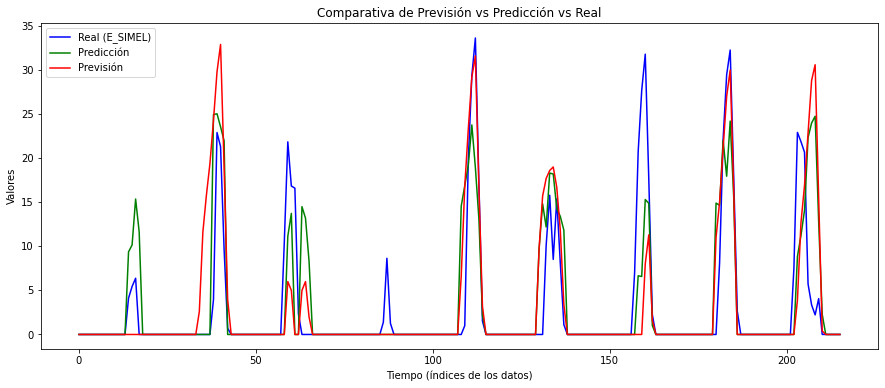

In [56]:
import matplotlib.pyplot as plt

# Asegúrate de que los índices están correctamente alineados
df_predicciones_totales = df_predicciones_totales.reset_index(drop=True)
df_previsiones_totales = df_previsiones_totales.reset_index(drop=True)

# Graficar
plt.figure(figsize=(15, 6))
plt.plot(df_predicciones_totales['E_SIMEL'], label='Real (E_SIMEL)', color='blue')
plt.plot(df_predicciones_totales['predicted_E_SIMEL'], label='Predicción', color='green')
plt.plot(df_previsiones_totales['PREVISION'], label='Previsión', color='red')
plt.title('Comparativa de Previsión vs Predicción vs Real')
plt.xlabel('Tiempo (índices de los datos)')
plt.ylabel('Valores')
plt.legend()
plt.show()


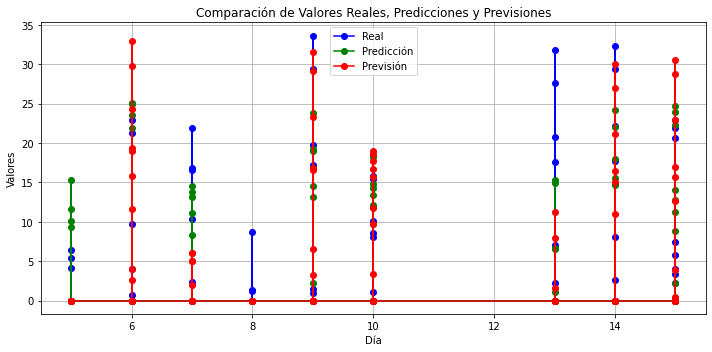

In [60]:
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame y ya contiene las fechas y los valores necesarios.
plt.figure(figsize=(10, 5))

# Real
plt.plot(df_predicciones_totales['Día'], df_predicciones_totales['E_SIMEL'], label='Real', color='blue', marker='o')

# Predicción
plt.plot(df_predicciones_totales['Día'], df_predicciones_totales['predicted_E_SIMEL'], label='Predicción', color='green', marker='o')

# Previsión
plt.plot(df_previsiones_totales['Día'], df_previsiones_totales['PREVISION'], label='Previsión', color='red', marker='o')

# Títulos y leyendas
plt.title('Comparación de Valores Reales, Predicciones y Previsiones')
plt.xlabel('Día')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
